<a href="https://colab.research.google.com/github/amikoshimrah/sothingshimrah/blob/main/Obesity_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# read the data
df=pd.read_csv('/content/Obesity Classification.csv')

In [ ]:
print(df.head())
print(df.tail())
print(df.info())
print(df.describe())
print(df.shape)

   ID  Age  Gender  Height  Weight   BMI          Label
0   1   25    Male     175      80  25.3  Normal Weight
1   2   30  Female     160      60  22.5  Normal Weight
2   3   35    Male     180      90  27.3     Overweight
3   4   40  Female     150      50  20.0    Underweight
4   5   45    Male     190     100  31.2          Obese
      ID  Age  Gender  Height  Weight  BMI        Label
103  106   11    Male     175      10  3.9  Underweight
104  107   16  Female     160      10  3.9  Underweight
105  108   21    Male     180      15  5.6  Underweight
106  109   26  Female     150      15  5.6  Underweight
107  110   31    Male     190      20  8.3  Underweight
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4

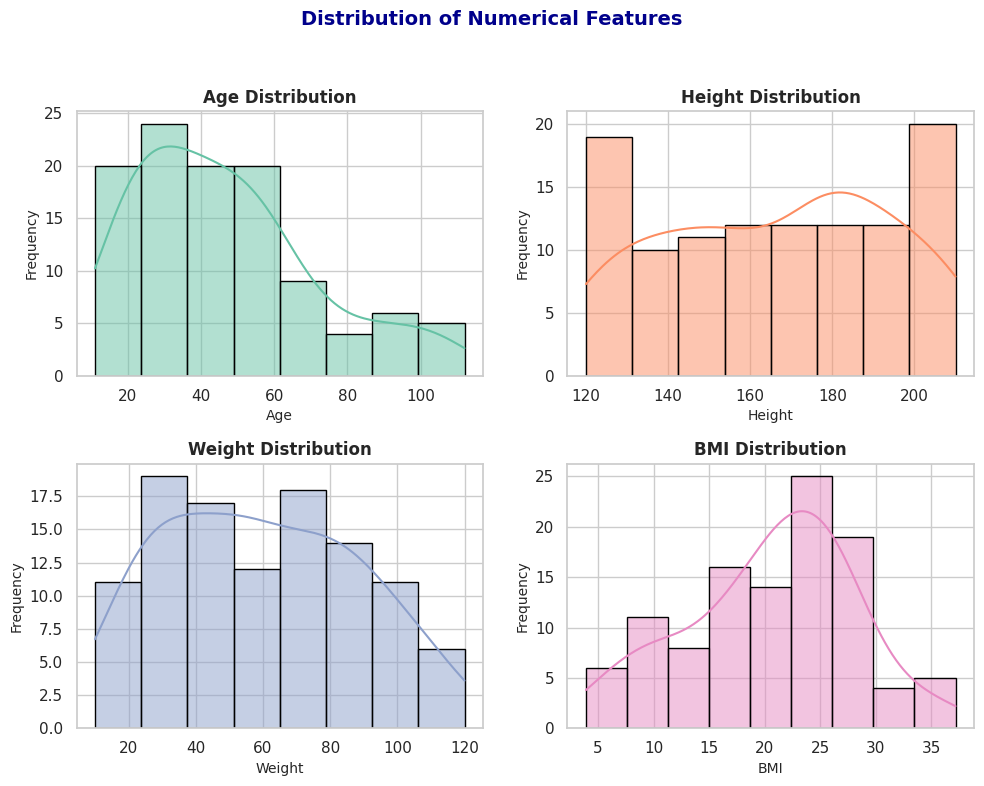

In [ ]:
# Plot distributions
# Use a modern Seaborn theme and color palette
sns.set_theme(style="whitegrid")
numerical_features = ['Age', 'Height', 'Weight', 'BMI']
colors = sns.color_palette("Set2", len(numerical_features))

plt.figure(figsize=(10, 8))  # Bigger size for better clarity

for i, col in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, color=colors[i-1], edgecolor='black', linewidth=1)
    plt.title(f"{col} Distribution", fontsize=12, fontweight='bold')
    plt.xlabel(col, fontsize=10)
    plt.ylabel("Frequency", fontsize=10)

plt.suptitle("Distribution of Numerical Features", fontsize=14, fontweight='bold', color='darkblue')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

**The distributions of the numerical features:**

1. Age is fairly normally distributed, centered around 30–40 years.

2. Height shows some clustering around 160–180 cm.

3. Weight and BMI have wider spreads, with BMI showing a slight right skew, which is expected in datasets dealing with obesity.

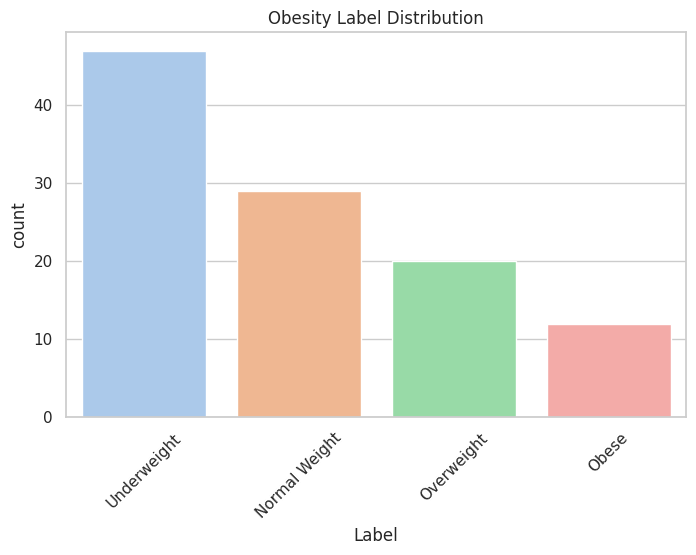

In [ ]:
# Check class distribution
label_counts = df['Label'].value_counts()

# Plot label distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Label', order=label_counts.index, palette='pastel')
plt.title("Obesity Label Distribution")
plt.xticks(rotation=45)
plt.show()



In [ ]:
# Encode categorical variables
df_encoded = df.copy()
le_gender = LabelEncoder()
le_label = LabelEncoder()

df_encoded['Gender'] = le_gender.fit_transform(df_encoded['Gender'])  # Male:1, Female:0
df_encoded['Label'] = le_label.fit_transform(df_encoded['Label'])     # Obesity classes as numbers

df_encoded.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,1,175,80,25.3,0
1,2,30,0,160,60,22.5,0
2,3,35,1,180,90,27.3,2
3,4,40,0,150,50,20.0,3
4,5,45,1,190,100,31.2,1


**Observations:**

The class distribution of obesity levels is imbalanced, with "Normal Weight" being the most frequent, followed by "Obese" and "Overweight".

We've successfully encoded:

Gender: Male → 1, Female → 0

Label: Obesity categories as integers (e.g., Normal Weight → 0, Obese → 1, etc.)

In [ ]:
# Features and target
X = df_encoded.drop(['ID', 'Label'], axis=1)
y = df_encoded['Label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize and train the decision tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Predictions
y_pred = dt_model.predict(X_test)
y_pred

array([0, 0, 1, 3, 0, 2, 0, 2, 3, 3, 3, 3, 0, 3, 1, 3, 1, 2, 3, 2, 0, 1])

In [ ]:
# Evaluation
acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=le_label.classes_)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {acc}')

Accuracy: 1.0


**Accuracy: 1.0 (or 100%)**

Model correctly predicted all 22 test samples.

Inference: This is a perfect score, which is rare in real-world datasets. It might indicate:

The model generalizes extremely well.

Or, the test set was very similar to the training set.

Or, the dataset is relatively simple and easy to learn.

In [ ]:
print(f'Classification Report:\n{report}')

Classification Report:
               precision    recall  f1-score   support

Normal Weight       1.00      1.00      1.00         6
        Obese       1.00      1.00      1.00         4
   Overweight       1.00      1.00      1.00         4
  Underweight       1.00      1.00      1.00         8

     accuracy                           1.00        22
    macro avg       1.00      1.00      1.00        22
 weighted avg       1.00      1.00      1.00        22



**What these metrics mean:**

**Precision:** All predictions made for each class were correct.

**Recall:** All actual instances of each class were correctly captured.

**F1-score:** Balanced harmonic mean of precision and recall — perfect 1.00.

**Support:** Number of true instances per class (e.g., 6 samples for Normal Weight).

**📌 Inference:**

No false positives or false negatives in the predictions.

Balanced performance across all obesity categories — no class was neglected.

In [ ]:
print(f'Confusion Matrix:\n{conf_matrix}')

Confusion Matrix:
[[6 0 0 0]
 [0 4 0 0]
 [0 0 4 0]
 [0 0 0 8]]


** Interpretation:**

All values lie on the diagonal — perfect predictions.

No confusion between similar classes like Overweight vs. Obese, which are typically hard to separate.

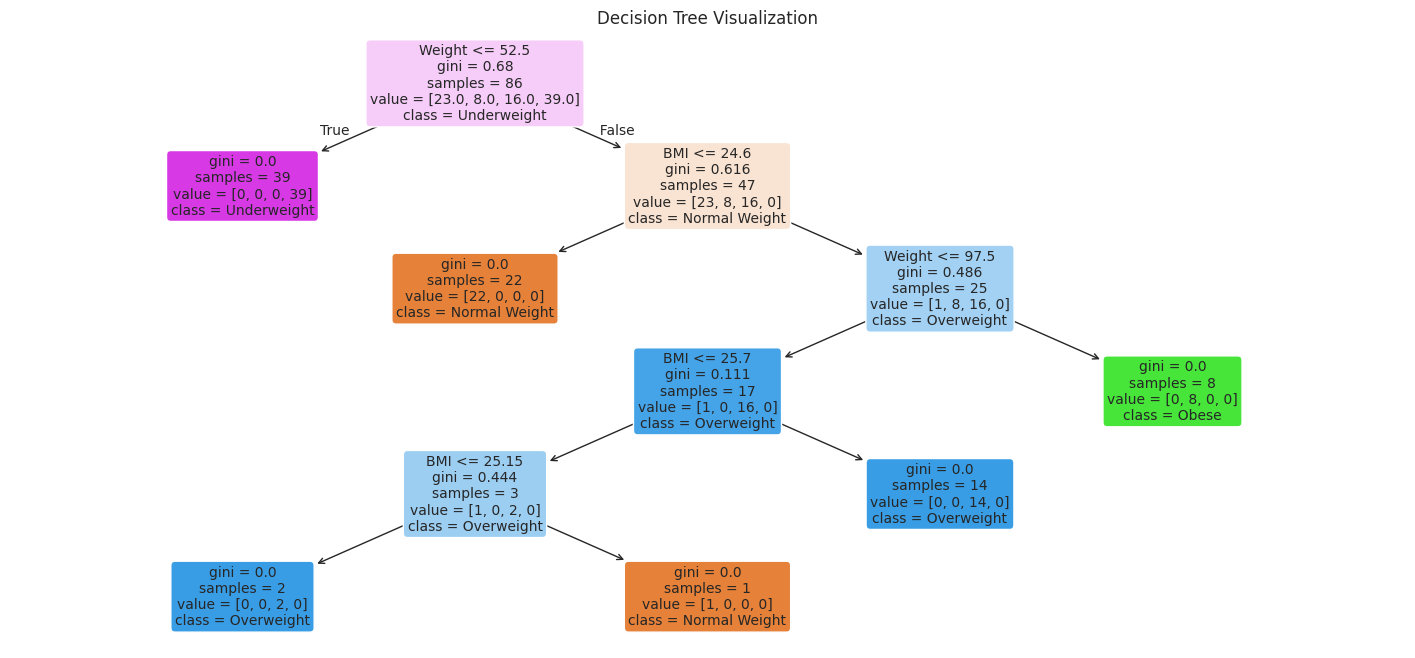

In [ ]:
# Plot the trained Decision Tree
plt.figure(figsize=(18, 8))  # Set the size of the plot
plot_tree(
    dt_model,                         # The trained DecisionTreeClassifier
    feature_names=X.columns,    # Column names used as features
    class_names=le_label.classes_,  # Human-readable class labels
    filled=True,                # Color nodes by purity
    rounded=True,               # Rounded corners for readability
    fontsize=10                 # Font size inside tree
)
plt.title("Decision Tree Visualization")
plt.show()


In [ ]:
#Hyperparameter Tuning
params = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), params,
                           cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("\nBest Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
best_pred = best_model.predict(X_test)
print("\nOptimized Accuracy:", accuracy_score(y_test, best_pred))


Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1}

Optimized Accuracy: 0.9090909090909091


**What this means:**

criterion='gini': The best splits were based on the Gini impurity, which favors frequent class separation.

max_depth=3: A shallower tree (only 3 levels deep) was better — reducing complexity and avoiding overfitting.

min_samples_leaf=1: Splitting is allowed until each leaf has at least 1 sample (default and often okay with small datasets).

**Optimized Accuracy Inference:**

The optimized model predicts 91% of test cases correctly — this is slightly lower than the previous perfect accuracy (100%), but that’s a good thing.